## Diabetes Data Analysis and Prediction Project 
Raj Shah || rshah62@uncc.edu
<br>
Nia Ibrahim || nibrahi3@uncc.edu
<br>
Chris McManus || cmcmanu8@uncc.edu
<br>
Sarah Shealy || sshealy2@uncc.edu
<br>
<br>
Meeting Schedule:
<br>
Tuesday/Thursdays @ 6pm, Saturday @ 5pm
<br>
<br>
Plan:
<br>
Create 3 models (decision tree, logistic regression, random forests) for this classification problem. We will evaluate the performance of each model using f1, recall, and precision to determine the best one.

##Introduction

Diabetes affects many people worldwide, so the need to make inferences driven by data about risk factors is beneficial and machine learning has shown to be an effectual way of doing this. [1] found that the prevalence of diabetes in India is 8-10%, and 46% or more of the population has pre-diabetes. Machine learning algorithms have demonstrated the abiity to predict future blood glucose levels and potential hypoglycemia or hyperglycemia. 

Our goal for this semester is to determine which attributes fom the "early stage diabetes risk prediction dataset" are correlated to early stage diabetes and present a future direction of addressing the mortality rate. To accomplish this, we intend on using classification associate rule mining as our project is primarily prediction based.

By using supervised learning, we will be able to infer which features are more likely to result in early stage diabetes through decision trees, random forests, and logistic regression.

## Data Selection:
<br>
We selected this dataset because it lends itself to a classification problem which we are confident we can develop and analyze the efficacy of machine learning models to solve this. We also believe that contributing to this is meaningful and could potentially benefit many people.

### Import and Read 
> 1. Data Upload <br/>
> 2. Common Modules <br/>
> 3. Data Files Read


```
# What features help predict diabetes and how can we use them to lower mortality rate.
```

#Research Question, Relevant Domain


**Data Source:**
Early stage diabetes risk prediction dataset.

In [ ]:
import pandas as pd
import seaborn as sns
import os.path as path
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
if( not path.isfile('./diabetes_data_upload.csv')):
  from google.colab import files
  data_to_load = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [ ]:
diabetes = pd.read_csv('./diabetes_data_upload.csv')

### Data Exploration

> descriptive stats <br/>
> info<br/>
> types of features<br/>
> Null Value Check<br/>

In [ ]:
diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
# Calculating skewness for age column
mean = 48.029
median = 47.500
std = 12.151
skewness = (3 * (mean-median)) / std
print("Mean:", mean, " Median:", median, " Std:", std, " Skewness:", skewness)

Mean: 48.029  Median: 47.5  Std: 12.151  Skewness: 0.1306065344416106


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
diabetes.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [ ]:
diabetes.isnull().sum()
diabetes.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

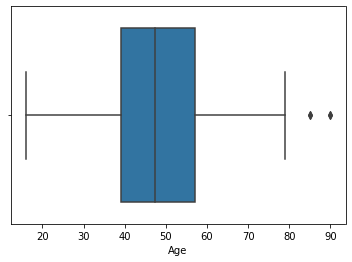

In [ ]:
# Outliers via visualization
sns.boxplot(x=diabetes['Age'])

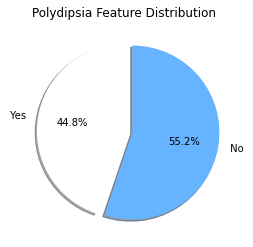

In [ ]:
YesVal=((diabetes['Polydipsia']=='Yes').sum()/diabetes['Polydipsia'].count())*100
noVal=((diabetes['Polydipsia']=='No').sum()/diabetes['Polydipsia'].count())*100
PolydipsiaChart=np.array([YesVal,noVal])
ployLabels=[' Yes ',' No ']
color=['#ffffff','#66b3ff']
explods=[0,0.1]
plt.title("Polydipsia Feature Distribution")
plt.pie(PolydipsiaChart,labels=ployLabels,shadow=True,autopct='%1.1f%%',explode=explods,startangle=90,colors=color)
plt.show()

## Data Preparation :
1. Fetched Row Data From Web in .execl format <br/>
2. Decided the features we wanted to use. <br/>
3. created temporary data frames to hold the data for each iteration and extracted the selected features. <br/>
4. handled missing values in the features column .<br/>
5. Used this dataframe to prepare the final dataset used for visualization.
6. visualized the data with different plots.

In [ ]:
# Change the important Features to binary values for better Anayslis and Convertions 
diabetes = diabetes.replace({'Polyuria': {'Yes': 1,'No': 0}})

diabetes = diabetes.replace({'Polydipsia': {'Yes': 1, 
                                'No': 0}})
diabetes = diabetes.replace({'Genital thrush': {'Yes': 1, 
                                'No': 0}})
diabetes = diabetes.replace({'Alopecia': {'Yes': 1, 
                                'No': 0}})
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,No,Yes,No,0,No,Yes,No,Yes,No,Yes,1,Yes,Positive
1,58,Male,0,0,No,Yes,No,0,Yes,No,No,No,Yes,No,1,No,Positive
2,41,Male,1,0,No,Yes,Yes,0,No,Yes,No,Yes,No,Yes,1,No,Positive
3,45,Male,0,0,Yes,Yes,Yes,1,No,Yes,No,Yes,No,No,0,No,Positive
4,60,Male,1,1,Yes,Yes,Yes,0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,Positive


In [ ]:
# Handling the Null Values 
diabetes.fillna(0)

diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
## Data Preparation
# Select features based on most common symptoms based on responses 'y' or 'n'.

# Split up data
from sklearn.model_selection import train_test_split

In [ ]:
## Modeling

# Supervised learning: Create 3 models (decision tree, logistic regression, random forests) for this classification problem. 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Evaluation: 
from sklearn.metrics import confusion_matrix
# We will evaluate the performance of each model using f1, recall, and precision to determine the best one.

References:
<br>
<br>
[1] R. Singla, A. Singla, Y. Gupta, S. Kalra, "Artificial Intelligence/Machine Learning in Diabetes Care," *Indian Journal of Endocrinology and Metabolism*, vol. 23, no. 4, 2019. 

**Data Source:** Early stage diabetes risk prediction dataset


[2] D. Dua, C. Graff, *UCI Machine Learning Repository*, Irvine, CA: University of California, Irvine, School of Information and Computer Sciences, 2017. [Online]. Available: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.


